In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a = pd.read_csv('b.csv')
aa = [i[0] for i in a.values.tolist()]

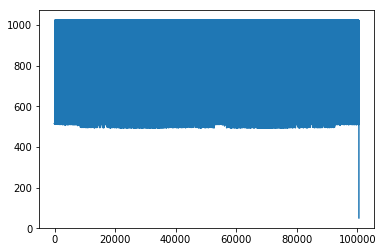

In [3]:
plt.plot(aa)

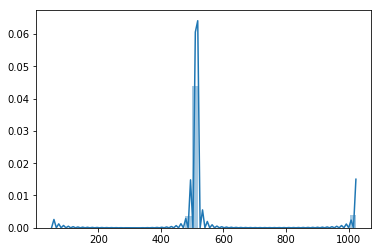

In [4]:
sns.distplot(aa)

In [5]:
prev_state = None
prev_state_at = None
last_ltoh_at = None
ltoh, htol, cycle = [], [], []
for t, v in enumerate(aa):

    if v < 600:
        state = 0
    elif v > 900:
        state = 1
    else:
        continue

    if state != prev_state:
        # Transition
        if prev_state is not None:
            if state == 1 and prev_state == 0 and len(cycle) < 10:
                print(f"{len(ltoh)}: {prev_state} -> {state} @{t} after {t-prev_state_at}")
            if state == 1 and prev_state == 0:
                if last_ltoh_at is not None:
                    cycle.append(t - last_ltoh_at)
                last_ltoh_at = t
                ltoh.append(t - prev_state_at)
            elif state == 0 and prev_state == 1:
                htol.append(t - prev_state_at)
            else:
                assert False

        prev_state = state
        prev_state_at = t


0: 0 -> 1 @68 after 68
1: 0 -> 1 @167 after 91
2: 0 -> 1 @266 after 91
3: 0 -> 1 @365 after 92
4: 0 -> 1 @464 after 91
5: 0 -> 1 @554 after 82
6: 0 -> 1 @649 after 88
7: 0 -> 1 @748 after 92
8: 0 -> 1 @832 after 76
9: 0 -> 1 @931 after 91
10: 0 -> 1 @1029 after 90


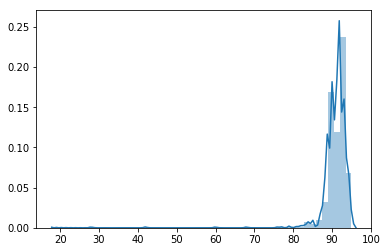

In [6]:
sns.distplot([i for i in ltoh ]);

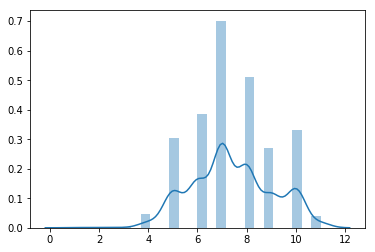

In [7]:
sns.distplot([i for i in htol]);

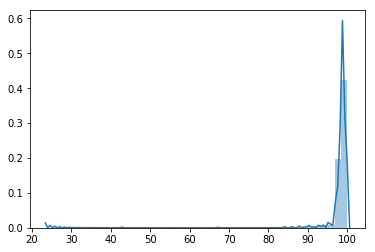

In [8]:
sns.distplot([i for i in cycle]);

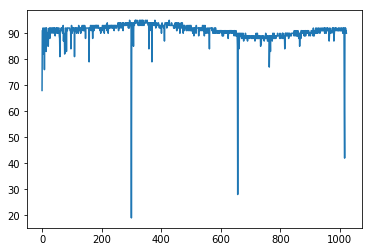

In [9]:
plt.plot(ltoh)

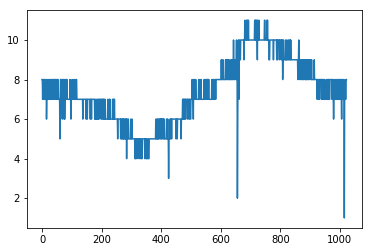

In [10]:
plt.plot(htol)